In [2]:
library("transformeR")


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded


Get the latest stable version (2.1.4) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.



In [3]:
load("Upscaling/ba_grid_5.Rdata", verbose = TRUE)
load("Upscaling/upscaling_fba/fba_grid_5.Rdata", verbose = TRUE)

Loading objects:
  ba.mergeGrid5
Loading objects:
  fba_grid_5


### Climatologías

In [4]:
climatologia_func <- function(grid){
    #Creamos un vector que nos deje sólo los píxeles que sí que tienen área quemada, en otras palabras que no sean vectores de ceros:
    vectores_con_area_quemada = list()
    for (x in grid$xyCoords$x){ #Indexamos con la coordenada x
        for (y in grid$xyCoords$y){ #Indexamos con la coordenada y
            subGrid = subsetGrid(grid = grid,  lonLim  = x, latLim  = y) #Extraemos el grid correspondiente a un pixel específico 
            if (any(0 != subGrid$Data)){
                vectores_con_area_quemada <- append(vectores_con_area_quemada, list(c(x,y))) #los píxeles de interés se guardan en una lista de vectores x,y 
            }
        }
    }
    #Una vez hecho esto, trabajamos sólo con los píxeles que nos interesan a través de la lista "vectores_con_area_quemada"
    medias_mensuales_por_pixel <- list()
    sd_mensuales_por_pixel <- list()
    for (pixel in 1:length(vectores_con_area_quemada)){
        #En el primer loop llamamos a cada pixel de la lista para trabajar con él:
        x = vectores_con_area_quemada[[pixel]][1] 
        y = vectores_con_area_quemada[[pixel]][2]
        for (season in 1:12){
            #En el segundo loop sacamos para cada pixel cada uno de los meses y lo guardamos como variable
            new_grid <- subsetGrid(grid = grid,season = season, lonLim  = x, latLim  = y)
            name <- paste("season", season, sep = "_")#le ponemos nombre a la variable àra cada mes del pixel a estudiar
            assign(name,new_grid)#le asignamos el nombre al grid de cada pixel para cada mes 
        }
        #Ahora tenemos 12 variables asignadas que representan cada mes del pixel que estamos estudiando
        #Y así, elaboramos las medias y desviación de todos los meses para tener una única serie temporal:
        climatologia_mean <- c()
        climatologia_sd <- c()
        for (i in 1:12){
            #este loop nos permite hacer la media y desviación para cada variable estacional que incluimos en los vectores climatologia_mean y climatologia_sd
            var_name <- paste("season", i, sep = "_")
            climatologia_mean <- c(climatologia_mean, mean(get(var_name)$Data))
            climatologia_sd <- c(climatologia_sd, sd(get(var_name)$Data))
        }
        #Finalmente, incluimos los vectores de las medias de todos los meses para el pixel especifico en una lista en forma de vector y con el nombre del pixel que se ha estudiado:
        nombre_item_lista <- paste(x, y, sep = ',')
        medias_mensuales_por_pixel[[nombre_item_lista]] <- climatologia_mean
        sd_mensuales_por_pixel[[nombre_item_lista]] <- climatologia_sd
    }
    return(list("Medias"=medias_mensuales_por_pixel,"Desviaciones"=sd_mensuales_por_pixel))
}

In [27]:
#Metemos em la función el grid más burdo y sacamos en forma de variable las medias y las desviaciones:
climatologias_mensuales_ba <- climatologia_func(grid = ba.mergeGrid5)
save(climatologias_mensuales_ba, file = "climatologias_grid5.Rdata")
medias_mensuales_ba <- climatologias_mensuales_ba$Medias
sd_mensuales_ba <- climatologias_mensuales_ba$Desviaciones

In [6]:
#Opcionalmente, he querido pasar la lista de los vectores en forma de data frame al ser más vistoso:
df_medias_mensuales_ba <- t(data.frame(medias_mensuales_ba))
rownames(df_medias_mensuales_ba) <- names(medias_mensuales_ba)
colnames(df_medias_mensuales_ba) <- c('enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre')
df_medias_mensuales_ba

##############Esto está comentado ya que las desviaciones de momento no me hace falta:
df_desviaciones_mensuales_ba <- t(data.frame(sd_mensuales_ba))
rownames(df_desviaciones_mensuales_ba) <- names(sd_mensuales_ba)
colnames(df_desviaciones_mensuales_ba) <- c('enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre')
#df_desviaciones_mensuales_ba

,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
"-177.5,67.5",0.000000,0.00000,0.0000000,0.0000000,0.0000000,2.555429e-01,70.275133,17.377119,5.110919,0.0000000,0.00000,0.000000
"-172.5,62.5",0.000000,0.00000,0.0000000,0.0000000,0.0000000,3.577643e+00,0.000000,0.000000,0.000000,0.0000000,0.00000,0.000000
"-172.5,67.5",0.000000,0.00000,0.0000000,0.0000000,0.0000000,1.377192e+02,2.236743,12.970671,0.000000,0.0000000,0.00000,0.000000
"-167.5,52.5",0.000000,0.00000,0.0000000,0.0000000,2.0443667,0.000000e+00,0.000000,0.000000,0.000000,0.0000000,0.00000,0.000000
"-167.5,62.5",0.000000,0.00000,0.0000000,0.0000000,35.0833190,1.550154e+01,0.000000,0.000000,0.000000,0.0000000,0.00000,0.000000
"-167.5,67.5",0.000000,0.00000,0.0000000,0.0000000,0.2555429,2.432798e+02,0.000000,0.000000,0.000000,0.0000000,0.00000,0.000000
"-162.5,57.5",0.000000,0.00000,0.0000000,0.0000000,154.3498000,4.410724e+02,141.061405,0.000000,0.000000,0.0000000,0.00000,0.000000
"-162.5,62.5",0.000000,0.00000,0.0000000,151.4534864,158.4190714,5.217068e+03,919.370343,941.967262,254.523810,0.0000000,0.00000,0.000000
"-162.5,67.5",0.000000,0.00000,0.0000000,0.0000000,477.4422429,2.441809e+03,3452.787938,510.069862,0.000000,0.0000000,0.00000,0.000000
"-157.5,17.5",8.537555,167.94650,102.2374818,0.9757182,70.7862429,6.107549e+01,330.547814,1047.749429,104.886610,112.5341619,19.34492,63.886505


### Fire Season

In [7]:
medias_mensuales_proporcion_ba <- list()
sd_mensuales_proporcion_ba <- list()
for (i in 1:length(medias_mensuales_ba)){
    vector <- medias_mensuales_ba[[i]]
    vector_proporcion <- ifelse(vector != 0, vector/sum(vector), 0)
    medias_mensuales_proporcion_ba[[names(medias_mensuales_ba[i])]] <- vector_proporcion
    
    vector <- sd_mensuales_ba[[i]]
    vector_proporcion <- ifelse(vector != 0, vector/sum(vector), 0)
    sd_mensuales_proporcion_ba[[names(sd_mensuales_ba[i])]] <- vector_proporcion
}

df_medias_mensuales_proporcion_ba<- t(data.frame(medias_mensuales_proporcion_ba))
rownames(df_medias_mensuales_proporcion_ba) <- names(medias_mensuales_proporcion_ba)
colnames(df_medias_mensuales_proporcion_ba) <- c('enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre')
#df_medias_mensuales_proporcion_ba


df_sd_mensuales_proporcion_ba<- t(data.frame(sd_mensuales_proporcion_ba))
rownames(df_sd_mensuales_proporcion_ba) <- names(sd_mensuales_ba)
colnames(df_sd_mensuales_proporcion_ba) <- c('enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre')
#df_sd_mensuales_proporcion_ba

In [8]:
fireSeassonList <- list()
for (i in 1:length(medias_mensuales_proporcion_ba)){
    vector <- medias_mensuales_proporcion_ba[[i]]
    vector_acumulado <- cumsum(vector)
    vector_acumulado_ordenado <- sort(vector_acumulado)
    vector_acumulado_ordenado_sinCeros <- vector_acumulado_ordenado[vector_acumulado_ordenado > 0 & vector_acumulado_ordenado <= 0.8]
    meses_vector <- unique(match(vector_acumulado_ordenado_sinCeros, vector_acumulado))
    if (length(meses_vector) > 0){
        fireSeassonList[[names(medias_mensuales_proporcion_ba[i])]] <- meses_vector
    }
}

#### Bimodales

In [9]:
fire_season_bimodal <- lapply(fireSeassonList, function(vector_1) {
  vector_2 <- seq(min(vector_1), max(vector_1))
  if (identical(vector_1, vector_2)) {
    return(FALSE)
  } else {
    return(TRUE)
  }
})

fire_season_bimodal

$`-177.5,67.5`
[1] FALSE

$`-167.5,62.5`
[1] FALSE

$`-167.5,67.5`
[1] FALSE

$`-162.5,57.5`
[1] FALSE

$`-162.5,62.5`
[1] FALSE

$`-162.5,67.5`
[1] FALSE

$`-157.5,17.5`
[1] FALSE

$`-157.5,22.5`
[1] FALSE

$`-157.5,57.5`
[1] FALSE

$`-157.5,62.5`
[1] FALSE

$`-157.5,67.5`
[1] FALSE

$`-152.5,17.5`
[1] FALSE

$`-152.5,57.5`
[1] FALSE

$`-152.5,62.5`
[1] FALSE

$`-152.5,67.5`
[1] FALSE

$`-147.5,62.5`
[1] FALSE

$`-147.5,67.5`
[1] FALSE

$`-142.5,62.5`
[1] FALSE

$`-142.5,67.5`
[1] FALSE

$`-137.5,57.5`
[1] TRUE

$`-137.5,62.5`
[1] FALSE

$`-137.5,67.5`
[1] FALSE

$`-132.5,57.5`
[1] FALSE

$`-132.5,62.5`
[1] FALSE

$`-132.5,67.5`
[1] FALSE

$`-127.5,47.5`
[1] TRUE

$`-127.5,52.5`
[1] FALSE

$`-127.5,57.5`
[1] FALSE

$`-127.5,62.5`
[1] FALSE

$`-127.5,67.5`
[1] FALSE

$`-122.5,32.5`
[1] FALSE

$`-122.5,37.5`
[1] FALSE

$`-122.5,42.5`
[1] FALSE

$`-122.5,47.5`
[1] FALSE

$`-122.5,52.5`
[1] TRUE

$`-122.5,57.5`
[1] FALSE

$`-122.5,62.5`
[1] FALSE

$`-122.5,67.5`
[1] FALSE

$`-117.5,32.5`
[1] FALSE

$`-117.5,37.5`
[1] FALSE

$`-117.5,42.5`
[1] FALSE

$`-117.5,47.5`
[1] FALSE

$`-117.5,52.5`
[1] FALSE

$`-117.5,57.5`
[1] FALSE

$`-117.5,62.5`
[1] FALSE

$`-117.5,67.5`
[1] FALSE

$`-112.5,27.5`
[1] FALSE

$`-112.5,32.5`
[1] FALSE

$`-112.5,37.5`
[1] FALSE

$`-112.5,42.5`
[1] FALSE

$`-112.5,47.5`
[1] FALSE

$`-112.5,52.5`
[1] FALSE

$`-112.5,57.5`
[1] FALSE

$`-112.5,62.5`
[1] FALSE

$`-112.5,67.5`
[1] FALSE

$`-107.5,17.5`
[1] FALSE

$`-107.5,22.5`
[1] FALSE

$`-107.5,27.5`
[1] FALSE

$`-107.5,32.5`
[1] FALSE

$`-107.5,37.5`
[1] FALSE

$`-107.5,42.5`
[1] FALSE

$`-107.5,47.5`
[1] FALSE

$`-107.5,52.5`
[1] FALSE

$`-107.5,57.5`
[1] FALSE

$`-107.5,62.5`
[1] FALSE

$`-102.5,17.5`
[1] FALSE

$`-102.5,22.5`
[1] FALSE

$`-102.5,27.5`
[1] FALSE

$`-102.5,32.5`
[1] FALSE

$`-102.5,37.5`
[1] FALSE

$`-102.5,42.5`
[1] FALSE

$`-102.5,47.5`
[1] FALSE

$`-102.5,52.5`
[1] FALSE

$`-102.5,57.5`
[1] FALSE

$`-102.5,62.5`
[1] FALSE

$`-97.5,17.5`
[1] FALSE

$`-97.5,22.5`
[1] FALSE

$`-97.5,27.5`
[1] FALSE

$`-97.5,32.5`
[1] FALSE

$`-97.5,37.5`
[1] FALSE

$`-97.5,42.5`
[1] FALSE

$`-97.5,47.5`
[1] FALSE

$`-97.5,52.5`
[1] FALSE

$`-97.5,57.5`
[1] TRUE

$`-97.5,62.5`
[1] FALSE

$`-97.5,67.5`
[1] FALSE

$`-92.5,-2.5`
[1] TRUE

$`-92.5,12.5`
[1] FALSE

$`-92.5,17.5`
[1] FALSE

$`-92.5,22.5`
[1] FALSE

$`-92.5,27.5`
[1] FALSE

$`-92.5,32.5`
[1] FALSE

$`-92.5,37.5`
[1] FALSE

$`-92.5,42.5`
[1] FALSE

$`-92.5,47.5`
[1] FALSE

$`-92.5,52.5`
[1] FALSE

$`-92.5,57.5`
[1] FALSE

$`-92.5,62.5`
[1] FALSE

$`-92.5,67.5`
[1] FALSE

$`-87.5,7.5`
[1] TRUE

$`-87.5,12.5`
[1] FALSE

$`-87.5,17.5`
[1] FALSE

$`-87.5,22.5`
[1] FALSE

$`-87.5,27.5`
[1] FALSE

$`-87.5,32.5`
[1] FALSE

$`-87.5,37.5`
[1] FALSE

$`-87.5,42.5`
[1] TRUE

$`-87.5,47.5`
[1] FALSE

$`-87.5,52.5`
[1] FALSE

$`-87.5,57.5`
[1] FALSE

$`-82.5,-7.5`
[1] TRUE

$`-82.5,-2.5`
[1] FALSE

$`-82.5,2.5`
[1] FALSE

$`-82.5,7.5`
[1] FALSE

$`-82.5,12.5`
[1] FALSE

$`-82.5,17.5`
[1] FALSE

$`-82.5,22.5`
[1] FALSE

$`-82.5,27.5`
[1] FALSE

$`-82.5,32.5`
[1] FALSE

$`-82.5,37.5`
[1] FALSE

$`-82.5,42.5`
[1] FALSE

$`-82.5,47.5`
[1] FALSE

$`-82.5,52.5`
[1] FALSE

$`-77.5,-12.5`
[1] TRUE

$`-77.5,-7.5`
[1] FALSE

$`-77.5,-2.5`
[1] FALSE

$`-77.5,2.5`
[1] FALSE

$`-77.5,7.5`
[1] FALSE

$`-77.5,12.5`
[1] FALSE

$`-77.5,17.5`
[1] FALSE

$`-77.5,22.5`
[1] FALSE

$`-77.5,27.5`
[1] FALSE

$`-77.5,32.5`
[1] FALSE

$`-77.5,37.5`
[1] FALSE

$`-77.5,42.5`
[1] FALSE

$`-77.5,47.5`
[1] FALSE

$`-77.5,52.5`
[1] FALSE

$`-77.5,57.5`
[1] FALSE

$`-72.5,-52.5`
[1] FALSE

$`-72.5,-47.5`
[1] TRUE

$`-72.5,-42.5`
[1] FALSE

$`-72.5,-37.5`
[1] FALSE

$`-72.5,-32.5`
[1] FALSE

$`-72.5,-27.5`
[1] TRUE

$`-72.5,-17.5`
[1] TRUE

$`-72.5,-12.5`
[1] FALSE

$`-72.5,-7.5`
[1] TRUE

$`-72.5,-2.5`
[1] TRUE

$`-72.5,2.5`
[1] FALSE

$`-72.5,7.5`
[1] FALSE

$`-72.5,12.5`
[1] FALSE

$`-72.5,17.5`
[1] FALSE

$`-72.5,22.5`
[1] FALSE

$`-72.5,37.5`
[1] FALSE

$`-72.5,42.5`
[1] FALSE

$`-72.5,47.5`
[1] FALSE

$`-72.5,52.5`
[1] FALSE

$`-72.5,57.5

##### Ejemplo de bimodal:

[1] TRUE

[1]  1  2  3  4  5  6  8  9 10

[1] 0.05284859 0.13117776 0.07549799 0.07996756 0.18141988 0.03608624
 [7] 0.00000000 0.01136963 0.09886642 0.11320205 0.19723853 0.02232535

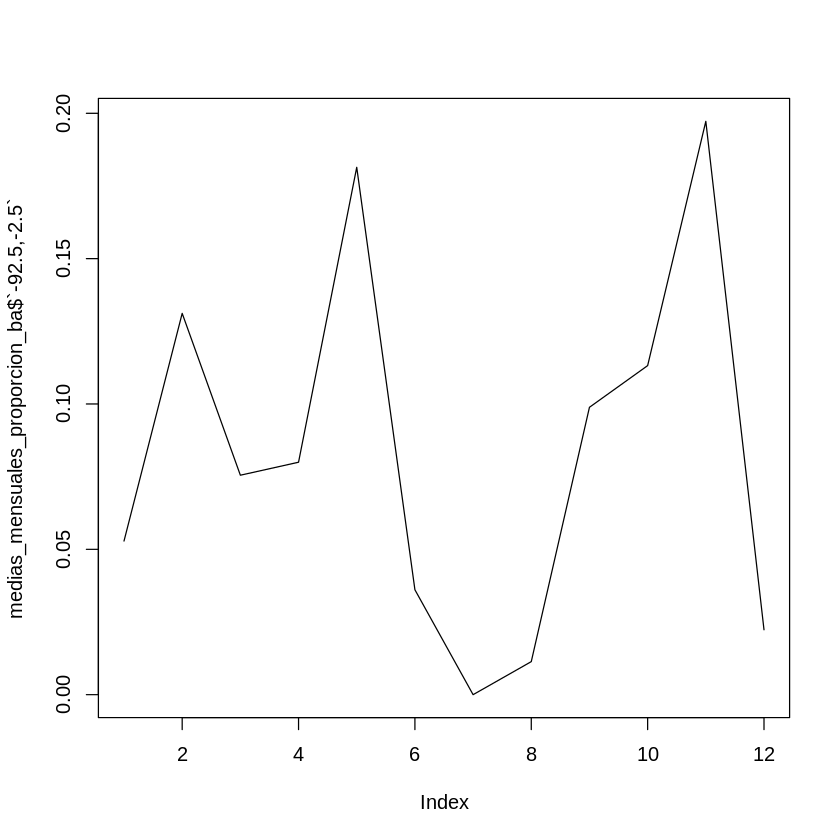

In [10]:
fire_season_bimodal$`-92.5,-2.5`
fireSeassonList$`-92.5,-2.5`
medias_mensuales_proporcion_ba$`-92.5,-2.5`
plot(medias_mensuales_proporcion_ba$`-92.5,-2.5`,type = 'l')

In [13]:
bimodales <- c()
unimodales <- c()
for (i in 1:length(fire_season_bimodal)){
    if (fire_season_bimodal[[i]] == TRUE){
        bimodales <- c(bimodales, names(fire_season_bimodal[i]))
    }else{
        unimodales <- c(unimodales, names(fire_season_bimodal[i]))
    }
}
length(medias_mensuales_ba) ##Vemos que la cantidad total de medias mensuales es mayor que las fire season bimodales. Esto es porque hay pixeles que no llegaban al 80% de tierra quemada

cat('Encontramos que un ',length(bimodales)/length(fire_season_bimodal)*100,
'% son bimodales mientras que un ', length(unimodales)/length(fire_season_bimodal)*100, '% son unimodales.')

[1] 804

Encontramos que un  13.95349 % son bimodales mientras que un  86.04651 % son unimodales.

### Caracterización global de la fire season

In [106]:
sigma_m <- function(numberSeassons){
    sigmas = c()
    for (m in 1:numberSeassons){
        sigmas = c(sigmas, 2*pi * (m-1)/numberSeassons)
    }
    return (sigmas)
}

In [110]:
caracterizacion_fireSeason <- function(mediasMensuales,sigmas){
    #mediasMensuales es una lista de vectores en donde cada vector son 12 medias mensuales
    L_xs <- list()
    L_ys <- list()
    Cs <- list()
    Ps <- list()
    for (i in 1:length(mediasMensuales)){
        x <- mediasMensuales[[i]]
        L_x_vector <- c()
        L_y_vector <- c()
        for (m in 1:12){
            L_x_vector <- c(L_x_vector, x[m] * cos(sigmas[m]))
            L_y_vector <- c(L_y_vector, x[m] * sin(sigmas[m]))
        }
        L_x = sum(L_x_vector)
        L_y = sum(L_y_vector)
        #seasonal concentration
        C = (sqrt(L_x^2 + L_y^2))/sum(x)
        #seasonal timing 
        P = atan(L_x / L_y)  ###¿Estamos trabajando en radianes o en grados?
        #L_xs[[names(mediasMensuales[i])]] <- L_x
        #L_ys[[names(mediasMensuales[i])]] <- L_y
        Cs[[names(mediasMensuales[i])]] <- C
        Ps[[names(mediasMensuales[i])]] <- P
    }
    return(list('C' = Cs, 'P' = Ps))
}

In [111]:
sigmas = sigma_m(numberSeassons = 12)
carctFS <- caracterizacion_fireSeason(mediasMensuales = medias_mensuales_ba, sigmas = sigmas)

###### Ejemplo de pixel con mucha concentración

Concentración de:  1
 Serie temporal:  1.21965 0 0 0 0 0 0 0 0 0 0 0

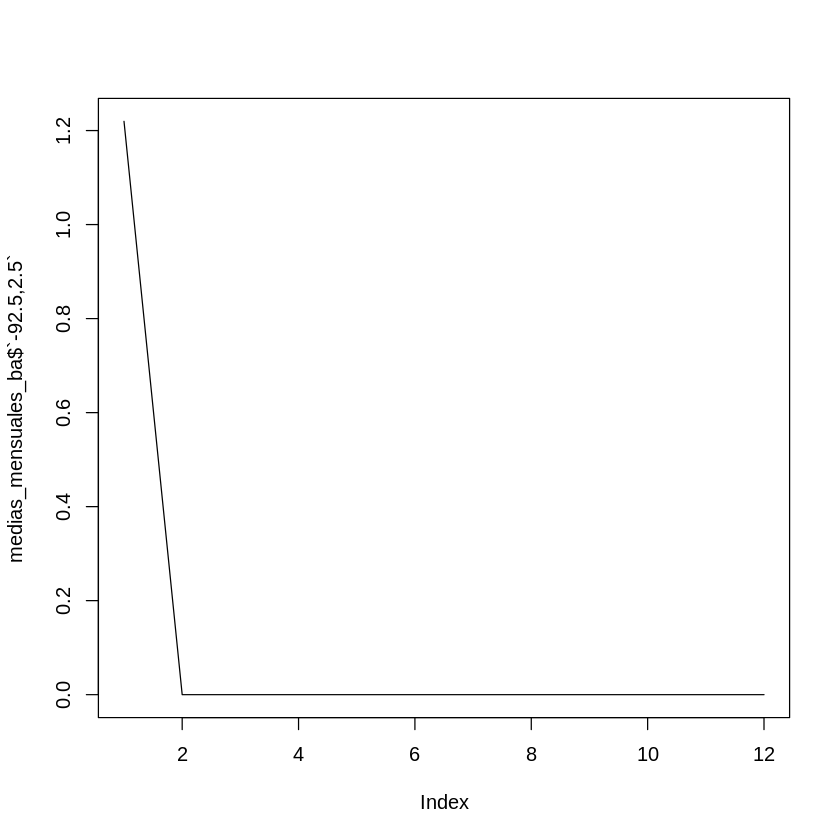

In [130]:
cat('Concentración de: ', carctFS$C$`-92.5,2.5`)
cat('\n','Serie temporal: ', medias_mensuales_ba$`-92.5,2.5`)
plot(medias_mensuales_ba$`-92.5,2.5`, type = 'l')

In [133]:
 carctFS$P$`-92.5,2.5`

[1] 1.570796

###### Ejemplo de pixel con poca concentración

Concentración de:  0.04228808
 Serie temporal:  122466.1 152143.3 147159.1 78428.39 41025.24 36058.35 93943.26 218170.2 145885.7 46562.76 24817.32 26778.84

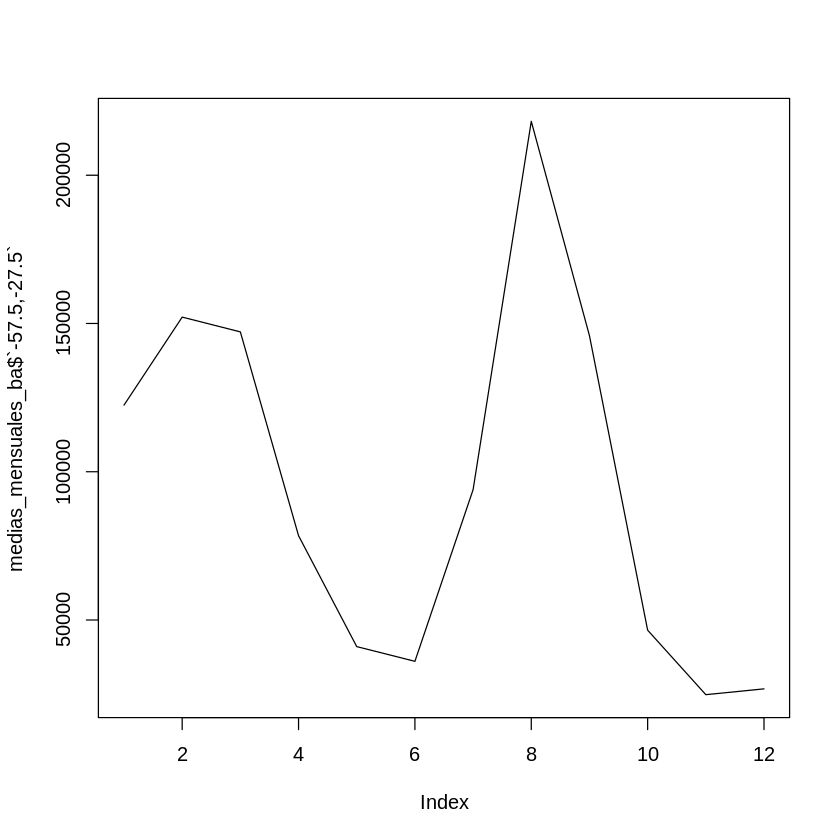

In [131]:
cat('Concentración de: ', carctFS$C$`-57.5,-27.5`)
cat('\n','Serie temporal: ',medias_mensuales_ba$`-57.5,-27.5`)
plot(medias_mensuales_ba$`-57.5,-27.5`, type = 'l')